I’ve never implemented a pinhole camera before, although I have heard the term many times.

Watching a [very enjoyable video from Keenan Crane’s Computer Graphics course](https://www.youtube.com/watch?v=PhxV_JrXeVk&list=PL9_jI1bdZmz2emSh0UQ5iOdT2xRHFHL7E&index=3) made me jump into action :

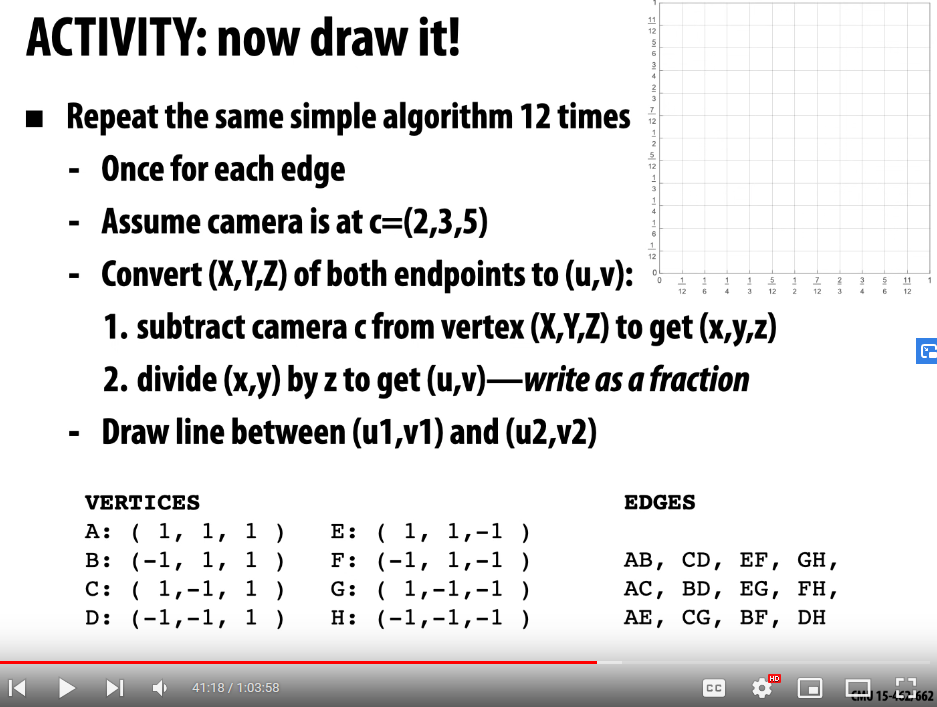

So let’s implement one of the simplest computer graphics concepts using Python.

# Modelling the Cube

A first step is to model a cube, using points and edges.

In [1]:
import numpy as np
vec = np.array

A = vec([1, 1, 1])
B = vec([-1, 1, 1])
C = vec([1, -1, 1])
D = vec([-1, -1, 1])
E = vec([1, 1, -1])
F = vec([-1, 1, -1])
G = vec([1, -1, -1])
H = vec([-1, -1, -1])

camera = vec([2, 3, 5])

Points = dict(zip("ABCDEFGH", [A, B, C, D, E, F, G, H]))

edges = ["AB", "CD", "EF", "GH", "AC", "BD", "EG", "FH", "AE", "CG", "BF", "DH"]

# Perspective projection 

The points can then be projected to 2D coordinates using perspective projection defined by the camera location.

In [2]:
points = {k: p - camera for k, p in Points.items()}

def pinhole(v):
    x, y, z = v
    return vec([x / z, y / z])

uvs = {k: pinhole(p) for k, p in points.items()}

# Rendering 

The final step is to bring the 2D points on the screen and draw the edges of the cube.

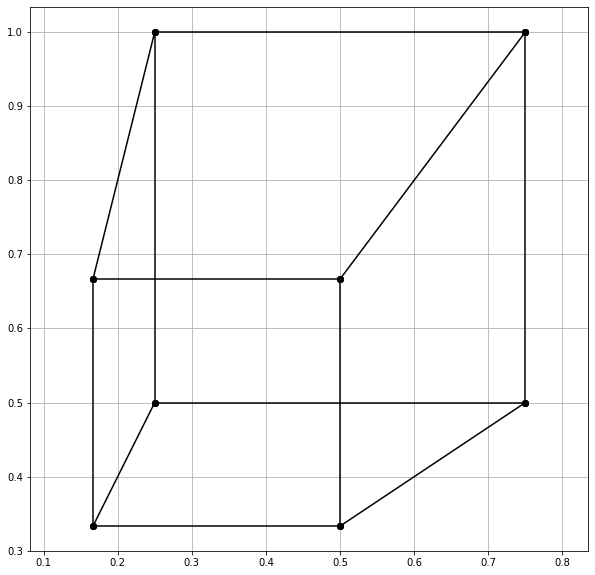

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
for a, b in edges:
    ua, va = uvs[a]
    ub, vb = uvs[b]
    plt.plot([ua, ub], [va, vb], "ko-")
    
plt.axis("equal")
plt.grid()